<a href="https://colab.research.google.com/github/Chocaholics/Miscellaneous/blob/main/N_Vortex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

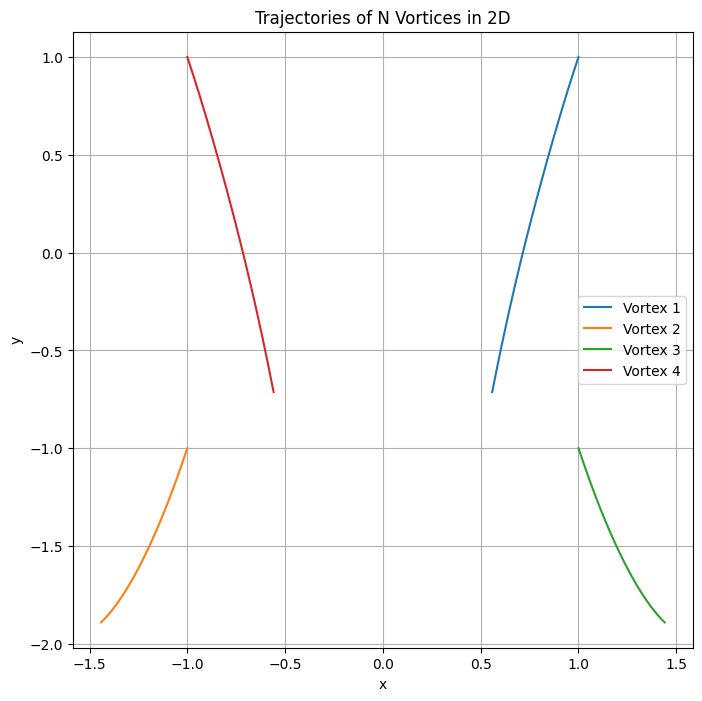

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
N = 4  # Number of vortices
Gamma = np.array([1.0, -1.0, 1.0, -1.0])  # Circulations of the vortices
time_span = (0, 10)  # Time span for the simulation

# Initial positions of the vortices (x, y) as [x1, y1, x2, y2, ...]
initial_positions = np.array([1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0])

# Define the ODE function for vortex motion
def vortex_motion(t, state):
    # state is a vector of the form [x1, y1, x2, y2, ..., xN, yN]
    dxdt = np.zeros_like(state)
    for i in range(N):
        xi, yi = state[2 * i], state[2 * i + 1]
        for j in range(N):
            if i != j:
                xj, yj = state[2 * j], state[2 * j + 1]
                # Biot-Savart law to compute velocity components
                dx = xi - xj
                dy = yi - yj
                distance_squared = dx**2 + dy**2
                if distance_squared > 1e-6:  # Avoid division by zero
                    dxdt[2 * i] += -Gamma[j] * dy / distance_squared
                    dxdt[2 * i + 1] += Gamma[j] * dx / distance_squared
    return dxdt / (2 * np.pi)

# Solve the ODE system
solution = solve_ivp(vortex_motion, time_span, initial_positions, method='RK45', t_eval=np.linspace(0, 10, 500))

# Plot the trajectories
plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(solution.y[2 * i], solution.y[2 * i + 1], label=f'Vortex {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of N Vortices in 2D')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


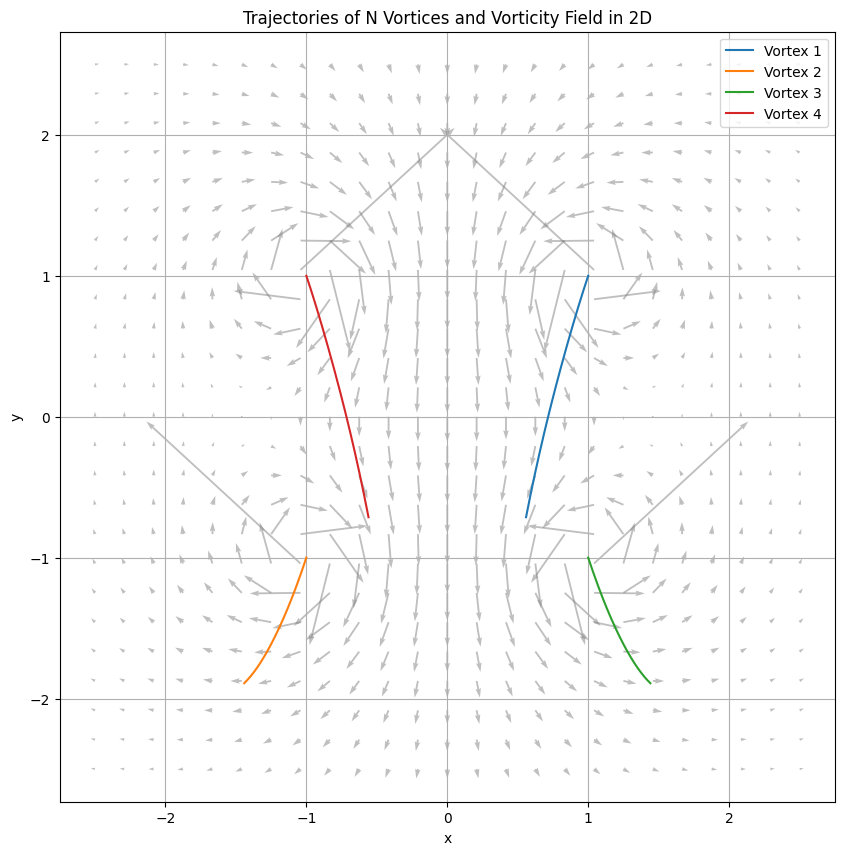

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
N = 4  # Number of vortices
Gamma = np.array([1.0, -1.0, 1.0, -1.0])  # Circulations of the vortices
time_span = (0, 10)  # Time span for the simulation

# Initial positions of the vortices (x, y) as [x1, y1, x2, y2, ...]
initial_positions = np.array([1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0])

# Define the ODE function for vortex motion
def vortex_motion(t, state):
    # state is a vector of the form [x1, y1, x2, y2, ..., xN, yN]
    dxdt = np.zeros_like(state)
    for i in range(N):
        xi, yi = state[2 * i], state[2 * i + 1]
        for j in range(N):
            if i != j:
                xj, yj = state[2 * j], state[2 * j + 1]
                # Biot-Savart law to compute velocity components
                dx = xi - xj
                dy = yi - yj
                distance_squared = dx**2 + dy**2
                if distance_squared > 1e-6:  # Avoid division by zero
                    dxdt[2 * i] += -Gamma[j] * dy / distance_squared
                    dxdt[2 * i + 1] += Gamma[j] * dx / distance_squared
    return dxdt / (2 * np.pi)

# Solve the ODE system
solution = solve_ivp(vortex_motion, time_span, initial_positions, method='RK45', t_eval=np.linspace(0, 10, 500))

# Set up the grid for vorticity field visualization
x_min, x_max, y_min, y_max = -2.5, 2.5, -2.5, 2.5
grid_points = 25  # Number of points along each dimension
x = np.linspace(x_min, x_max, grid_points)
y = np.linspace(y_min, y_max, grid_points)
X, Y = np.meshgrid(x, y)

# Calculate the velocity field induced by the vortices
U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(N):
    xi, yi = initial_positions[2 * i], initial_positions[2 * i + 1]
    for j in range(grid_points):
        for k in range(grid_points):
            dx = X[j, k] - xi
            dy = Y[j, k] - yi
            distance_squared = dx**2 + dy**2
            if distance_squared > 1e-6:  # Avoid division by zero
                U[j, k] += -Gamma[i] * dy / distance_squared
                V[j, k] += Gamma[i] * dx / distance_squared
U /= (2 * np.pi)
V /= (2 * np.pi)

# Plot the trajectories and vorticity field
plt.figure(figsize=(10, 10))

# Plot the vortex trajectories
for i in range(N):
    plt.plot(solution.y[2 * i], solution.y[2 * i + 1], label=f'Vortex {i+1}')

# Plot the vorticity field
plt.quiver(X, Y, U, V, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of N Vortices and Vorticity Field in 2D')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
